In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rpsat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rpsat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rpsat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rpsat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv(r"D:\Guvi\Projects\Final Projects\Project 2\Dataset\FinalBalancedDataset.csv")
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [5]:
# Text Preprocessing and Feature Extraction
# Convert text into numerical features using Bag of Words and TF-IDF
def clean_text(texts):
    clean_texts = []   
    lemmatizer = WordNetLemmatizer()
    for text in texts:
        text = text.lower()
        tokens = word_tokenize(text)
        cleaned_tokens = []
        for word in tokens:
            if (word.isalnum()) and (not word.isdigit()) and (word not in stop_words):
                word = word.strip(string.punctuation) # Removing punctuation
                word = lemmatizer.lemmatize(word)
                word = word.strip() # Removing spaces
                cleaned_tokens.append(word)
        cleaned_text = " ".join(cleaned_tokens)
        clean_texts.append(cleaned_text)
    return clean_texts

df = df.sample(5000)
corpus = clean_text(df['tweet'].values)
model = TfidfVectorizer()
data = pd.DataFrame(model.fit_transform(corpus).toarray())
data.columns = model.get_feature_names_out()
data.index = corpus
data['Toxicity'] = df['Toxicity']

In [7]:
X = data.drop(['Toxicity'],axis=1) 
y = df['Toxicity']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2) 

In [6]:
#tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
#X = tfidf.fit_transform(df['text']).toarray()  # 'text' column contains the tweet text
#y = df['toxic']  # 'toxic' column contains labels (1: Toxic, 0: Non-toxic)

*********DecisionTreeClassifier*********
Test Metrics
Test Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       579
           1       0.92      0.87      0.89       421

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000

Confusion Matrix - Test:
 [[546  33]
 [ 54 367]]


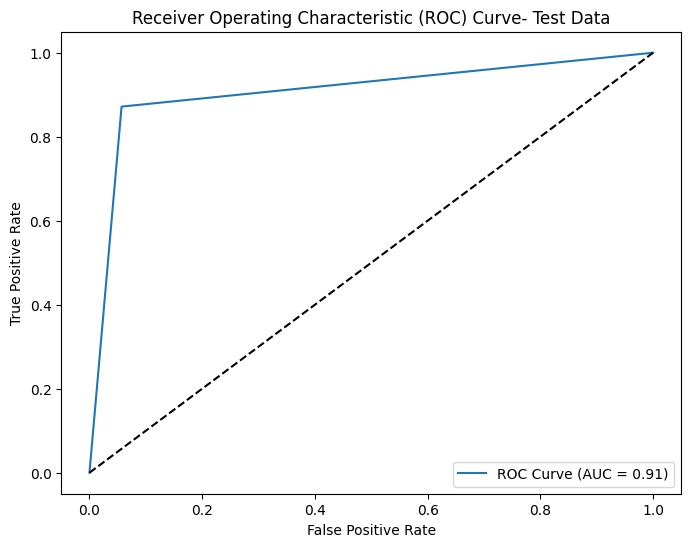

Train Metrics
Train Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2304
           1       1.00      1.00      1.00      1696

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Confusion Matrix - Train:
 [[2304    0]
 [   0 1696]]


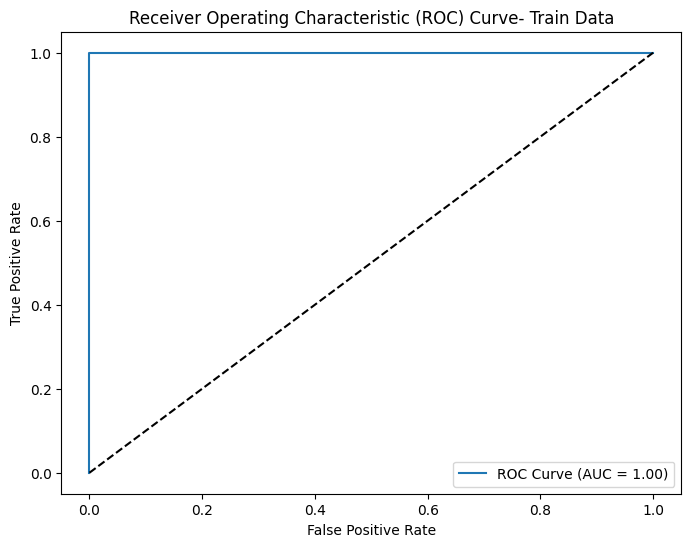

*********RandomForestClassifier*********
Test Metrics
Test Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       579
           1       0.95      0.86      0.90       421

    accuracy                           0.92      1000
   macro avg       0.93      0.91      0.92      1000
weighted avg       0.92      0.92      0.92      1000

Confusion Matrix - Test:
 [[561  18]
 [ 60 361]]


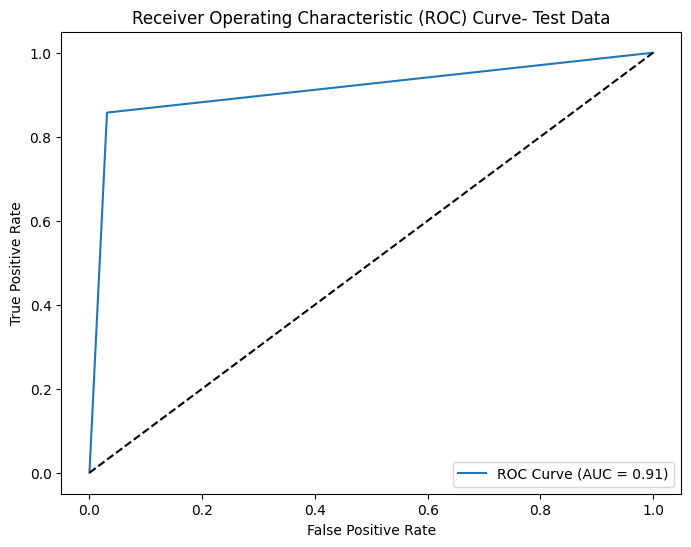

Train Metrics
Train Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2304
           1       1.00      1.00      1.00      1696

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Confusion Matrix - Train:
 [[2304    0]
 [   0 1696]]


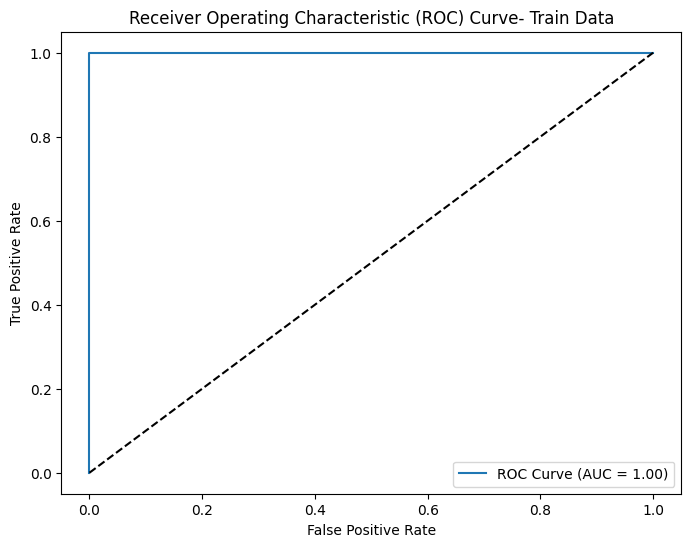

*********MultinomialNB*********
Test Metrics
Test Classification Report for MultinomialNB:

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       579
           1       0.89      0.86      0.88       421

    accuracy                           0.90      1000
   macro avg       0.90      0.89      0.89      1000
weighted avg       0.90      0.90      0.90      1000

Confusion Matrix - Test:
 [[536  43]
 [ 60 361]]


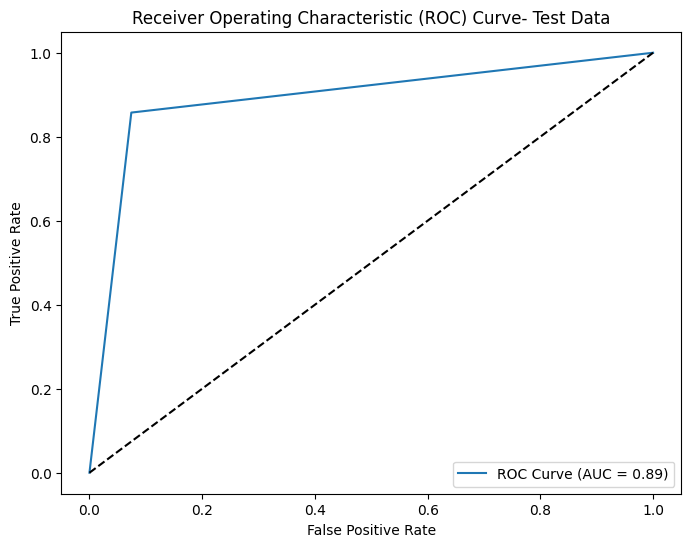

Train Metrics
Train Classification Report for MultinomialNB:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2304
           1       0.97      0.97      0.97      1696

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

Confusion Matrix - Train:
 [[2260   44]
 [  59 1637]]


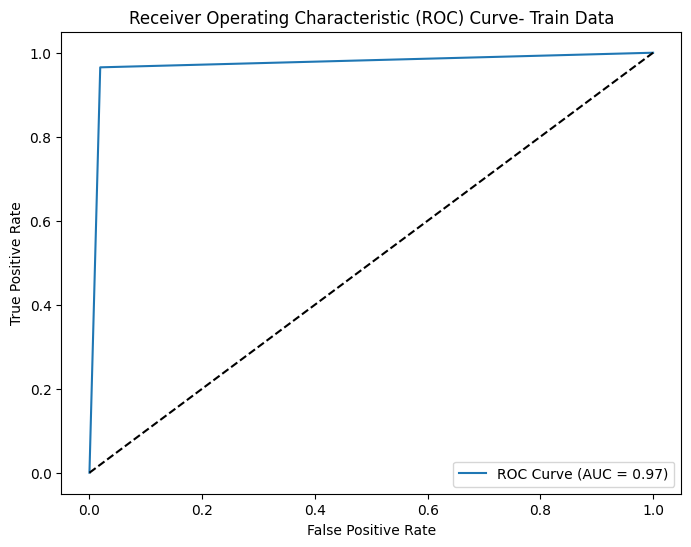

*********KNeighborsClassifier*********
Test Metrics
Test Classification Report for KNeighborsClassifier:

              precision    recall  f1-score   support

           0       0.59      1.00      0.74       579
           1       1.00      0.03      0.05       421

    accuracy                           0.59      1000
   macro avg       0.79      0.51      0.39      1000
weighted avg       0.76      0.59      0.45      1000

Confusion Matrix - Test:
 [[579   0]
 [410  11]]


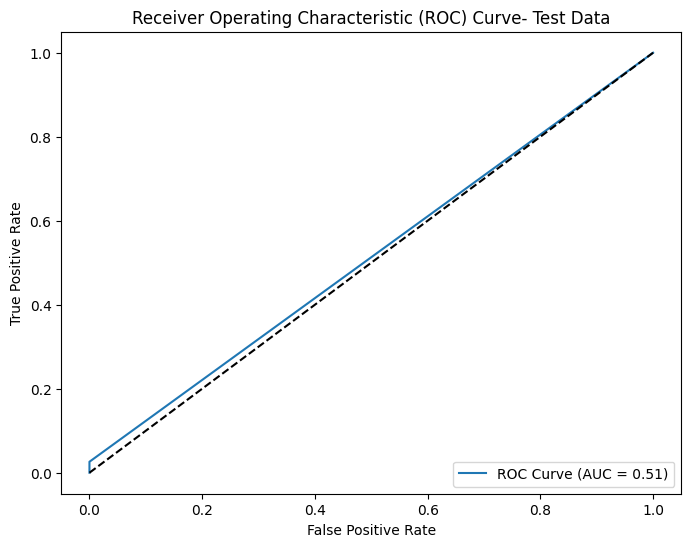

Train Metrics
Train Classification Report for KNeighborsClassifier:

              precision    recall  f1-score   support

           0       0.58      1.00      0.74      2304
           1       0.98      0.03      0.06      1696

    accuracy                           0.59      4000
   macro avg       0.78      0.52      0.40      4000
weighted avg       0.75      0.59      0.45      4000

Confusion Matrix - Train:
 [[2303    1]
 [1643   53]]


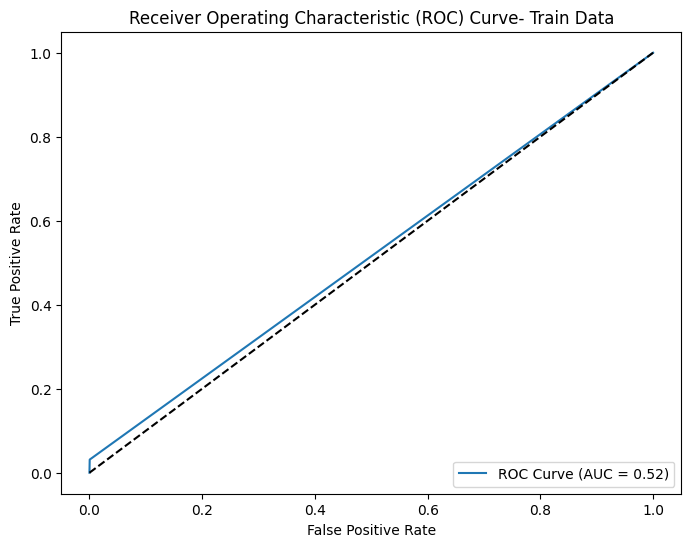

In [9]:
# Execution & Evaluation
models = [DecisionTreeClassifier(),
          RandomForestClassifier(),
          MultinomialNB(),
          KNeighborsClassifier(),
          SVC(kernel='linear', probability=True)  # SVM with probability=True to calculate ROC curve
          ]

for model in models:   
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"*********{type(model).__name__}*********")

    print(f"Test Metrics")
    # Classification Report - Test
    print(f"Test Classification Report for {type(model).__name__}:\n")
    print(classification_report(y_test, test_pred))

    # Confusion Matrix - Test
    confusion_matrix1 = confusion_matrix(y_test, test_pred)
    print("Confusion Matrix - Test:\n", confusion_matrix1)

    # ROC curve and AUC score - Test
    fpr, tpr, thresholds = roc_curve(y_test, test_pred)
    auc_score = roc_auc_score(y_test, test_pred)
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve- Test Data")
    plt.legend(loc="lower right")
    plt.show()
    
    print(f"Train Metrics")
    # Classification Report - Train
    print(f"Train Classification Report for {type(model).__name__}:\n")
    print(classification_report(y_train, train_pred))

    # Confusion Matrix - Train
    confusion_matrix2 = confusion_matrix(y_train, train_pred)
    print("Confusion Matrix - Train:\n", confusion_matrix2)

    # ROC curve and AUC score - Train
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    auc_score = roc_auc_score(y_train, train_pred)
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random performance
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve- Train Data")
    plt.legend(loc="lower right")
    plt.show()